# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
%cd C:\Users\Abana\Downloads

C:\Users\Abana\Downloads


In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [3]:
# Add any additional import statements you need here
import seaborn as sns

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
#from textbook
sw = set(stopwords.words('english'))

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.UNICODE_EMOJI : 
    for em in emoji.UNICODE_EMOJI[country] : 
        all_language_emojis.add(em)

        
# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens
    return(0)


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    #from textbook
    return [t for t in tokens if t.lower() not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    text = text.split()
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


In [4]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"
data_location = "/Users/Abana/Downloads/"
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "/Users/Abana/Downloads/twitter" 
lyrics_folder = "/Users/Abana/Downloads/lyrics"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data
df_lyrics = {
    'artist': [],
    'song_name': [],
    'contents': []
}

for artist_folder in os.listdir(lyrics_folder):
    for song_file in os.listdir(os.path.join(lyrics_folder, artist_folder)):
        with open(os.path.join(lyrics_folder, artist_folder, song_file), 'r') as f:
            song_lyrics = f.read()
        df_lyrics['artist'].append(artist_folder)
        df_lyrics['song_name'].append(song_file.replace('www_azlyrics_comkcijojo_', '').replace('www_azlyrics_comsammhenshaw_', '').replace('.txt', ''))
        df_lyrics['contents'].append(song_lyrics)
        
df_lyrics = pd.DataFrame(df_lyrics)
df_lyrics.head()

,artist,song_name,contents
0,cher,cher_88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,cher_adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,cher_afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,cher_again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,cher_alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."


In [6]:
# Read in the twitter data
#Reading in data
df_twitter = {
    'artist': [],
    'description': []
}
for filename in os.listdir(twitter_folder):
    if 'data' in filename:
        artist = filename.split('_')[0]
        with open(os.path.join(twitter_folder, filename), 'r', encoding='utf-8') as f:
            for line in f:
                fields = [t.strip() for t in line.split('\t') if t.strip()]
                description = fields[-1]
                if description=='description':
                    continue
                df_twitter['artist'].append(artist)
                df_twitter['description'].append(description)    
    
df_twitter = pd.DataFrame(df_twitter)
df_twitter.head()

,artist,description
0,cher,1014
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,csu
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


In [7]:
my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]
df_lyrics["tokens"] = df_lyrics['contents'].apply(prepare, pipeline=my_pipeline)
df_twitter["tokens"] = df_twitter["description"].apply(prepare, pipeline=my_pipeline)
df_twitter['has_emoji'] = df_twitter["description"].apply(contains_emoji)

In [8]:
%pwd

'C:\\Users\\Abana\\Downloads'

In [9]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

#with open('negative-words.txt', 'r') as datafile:
    #negative_lines = datafile.readlines()
with open('/Users/Abana/Downloads/negative-words.txt', 'r') as datafile:
    negative_lines = datafile.readlines()
    
negative_words = []
for line in negative_lines:
    if ';' not in line and line !='\n':
        negative_words.append(line.strip())
        
with open('positive-words.txt', 'r') as datafile:
    positive_lines = datafile.readlines()

positive_words = []
for line in positive_lines:
    if ';' not in line and line !='\n':
        positive_words.append(line.strip())
        
df_tidytext = pd.read_csv('tidytext_sentiments.txt', sep='\t')

df_sentiment = {
    'word':[],
    'sentiment':[]
}

[df_sentiment['word'].append(word) for word in negative_words]
[df_sentiment['sentiment'].append('negative') for i in range(len(negative_words))]

[df_sentiment['word'].append(word) for word in positive_words]
[df_sentiment['sentiment'].append('positive') for i in range(len(positive_words))]

[df_sentiment['word'].append(word) for word in df_tidytext['word']]
[df_sentiment['sentiment'].append(sent) for sent in df_tidytext['sentiment']]

df_sentiment = pd.DataFrame(df_sentiment)
df_sentiment['score'] = np.where(df_sentiment['sentiment']=='negative', -1, 1)

In [10]:
df_sentiment

,word,sentiment,score
0,2-faced,negative,-1
1,2-faces,negative,-1
2,abnormal,negative,-1
3,abolish,negative,-1
4,abominable,negative,-1
...,...,...,...
21917,win,positive,1
21918,winner,positive,1
21919,winners,positive,1
21920,winning,positive,1


In [11]:
# your code here

def sentiment_score(tokens, df):
    score = 0
    for token in tokens:
        for idx in df.loc[(df['word'] == token)].index.tolist():
            score += df['score'][idx]
    return score

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [12]:
df_lyrics['score'] = df_lyrics['tokens'].apply(lambda x: sentiment_score(x, df_sentiment))

In [13]:
df_lyrics

,artist,song_name,contents,tokens,score
0,cher,cher_88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n...","[88, degrees, stuck, la, aint, got, friends, h...",6
1,cher,cher_adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if...","[different, kind, love, song, world, crazy, sa...",71
2,cher,cher_afterall,"""After All""\n\n\n\nWell, here we are again\nI ...","[well, guess, must, fate, weve, tried, deep, i...",-9
3,cher,cher_again,"""Again""\n\n\n\nAgain evening finds me at your ...","[evening, finds, door, ask, could, try, dont, ...",-1
4,cher,cher_alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs...","[alfie, whats, alfie, moment, live, whats, sor...",23
...,...,...,...,...,...
415,robyn,robyn_wedancetothebeat114528,"""We Dance To The Beat""\n\n\n\nWe dance to the ...","[dance, beat, dance, beat, dance, beat, dance,...",57
416,robyn,robyn_wheredidourlovego,"""Where Did Our Love Go""\n\n\n\nThoughts about ...","[love, go, thoughts, thinkin, used, love, stro...",22
417,robyn,robyn_whosthatgirl,"""Who's That Girl""\n\n\n\nGood girls are pretty...","[whos, girl, good, girls, pretty, like, time, ...",62
418,robyn,robyn_witheveryheartbeat,"""With Every Heartbeat""\n\n\n\nMaybe we could m...","[every, heartbeat, maybe, could, make, right, ...",-8


In [14]:
df_lyrics.groupby('artist')['score'].mean()
print("Artist has the higher average sentiment per song:", df_lyrics.groupby('artist')['score'].mean())

Artist has the higher average sentiment per song: artist
cher     9.993671
robyn    8.971154
Name: score, dtype: float64


In [15]:
lowest_song = df_lyrics[df_lyrics['artist']=='cher'].sort_values('score')[:3]
highest_song = df_lyrics[df_lyrics['artist']=='cher'].sort_values('score', ascending=False)

for idx, row in lowest_song.iterrows():
    print("Top 3 lowest sentiments song of Cher artist:", row['song_name'].replace("cher_", ""))
    print(row['contents'])
    print('-'*100)
    
print('\n')
for song in highest_song.iterrows():
    print("Top 3 highest sentiments song of Cher artist:", row['song_name'].replace("cher_", ""))
    print(row['contents'])
    print('-'*100)

Top 3 lowest sentiments song of Cher artist: bangbang
"Bang-Bang"



Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

I was five and you were six
We rode on horses made of sticks
I wore black you wore white
You would always win the fight

Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

Seasons came and changed the time
I grew up I called you mine
You would always laugh and say
Remember when we used to play

Bang bang you shot me down
Bang bang and I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

Music played and people sang
Just for me the church bells rang
After echoes from a gun
We both vowed that we'd be one

Now you're gone I don't know why
Sometimes I cry
You didn't say goodbye
You didn't take the time to lie

Bang bang you shot me down
Bang bang I hit the ground
Bang bang that awful sound
Bang bang my baby shot me down

Bang b

In [16]:
lowest_song = df_lyrics[df_lyrics['artist']=='robyn'].sort_values('score')[:3]
highest_song = df_lyrics[df_lyrics['artist']=='robyn'].sort_values('score', ascending=False)

for idx, row in lowest_song.iterrows():
    print("Top 3 lowest sentiments song of Robyn artist:", row['song_name'].replace("robyn_", ""))
    print(row['contents'])
    print('-'*100)
    
print('\n')
for song in highest_song.iterrows():
    print("Top 3 highest sentiments song of Robyn artist:", row['song_name'].replace("robyn_", ""))
    print(row['contents'])
    print('-'*100)

Top 3 lowest sentiments song of Robyn artist: dontfuckingtellmewhattodo
"Don't Fucking Tell Me What To Do"



My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me

My smoking is killing me
My diet is killing me
My heels are killing me
My shopping's killing me
My ego is killing me
Can't sleep, it's killing me
My label's killing me
Kickdrum

My phone is killing me
My email is killing me
These hours are killing me
My tour is killing me
This flight is killing me
My manager's killing me
My mother's killing me
My landlord's killing me
My boss is killing me
The TV is killing me
Your nagging is killing me
My boyfriend's killing me
My talking's killing me
Killing 

array([<AxesSubplot:title={'center':'cher'}>,
       <AxesSubplot:title={'center':'robyn'}>], dtype=object)

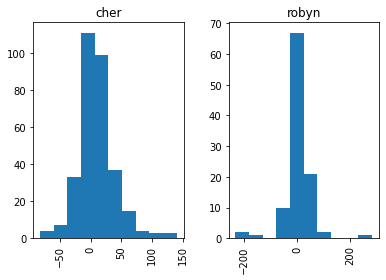

In [17]:
df_lyrics['score'].hist(by=df_lyrics['artist'])

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Cher

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The lyric of song content some keywords is driving the sentiment score

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The lyric of song content some keywords is driving the sentiment score

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [18]:
def tweet_score(s, df):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    score = 0
    for token in emojis:
        for idx in df.loc[(df['word'] == token)].index.tolist():
            score += df['score'][idx]
    return score

In [19]:
# your code here
positive_emoji = ['😂', '❤️', '😍', '😘', '💕', '😊', '💜', '💓', '🙃', '👏🏻', '💘', '🥰']
negative_emoji = ['😭', '😔', '😌', '🤫', '😩', '🤢', '😱', '😪', '😢', '💔', '😈', '😥']
emo = positive_emoji + negative_emoji
score = []
[score.append(1) for i in range(len(positive_emoji))]
[score.append(-1) for i in range(len(negative_emoji))]

df_emoji = pd.DataFrame({
    'word': emo,
    'score': score
})

df_twitter_tmp = df_twitter[df_twitter['has_emoji']==True]
df_twitter_tmp['score'] = df_twitter_tmp['tokens'].apply(lambda x: tweet_score(x, df_emoji))

<ipython-input-19-87b31aaa5404>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_tmp['score'] = df_twitter_tmp['tokens'].apply(lambda x: tweet_score(x, df_emoji))


In [20]:
df_twitter_tmp

,artist,description,tokens,has_emoji,score
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",True,2
10,cher,do what thou wilt. 🖤✨,"[thou, wilt, 🖤✨]",True,0
22,cher,Ubuntu to Mudita 🧩 INFP🌻,"[ubuntu, mudita, 🧩, infp🌻]",True,0
25,cher,Romanos 8:31 ✝️,"[romanos, 831, ✝️]",True,0
31,cher,Just some guy 🙃,"[guy, 🙃]",True,1
...,...,...,...,...,...
4353147,robynkonichiwa,"Artist and promoter, NHS worker, progressive r...","[artist, promoter, nhs, worker, progressive, r...",True,1
4353150,robynkonichiwa,"A beer-drinking, sport-watching, c̶a̶t̶-̶o̶w̶n...","[beerdrinking, sportwatching, c̶a̶t̶̶o̶w̶n̶i̶n...",True,0
4353162,robynkonichiwa,"""Fuck tragedy. Love, Gracey"" #AllBlackLivesMat...","[fuck, tragedy, love, gracey, #allblacklivesma...",True,0
4353163,robynkonichiwa,"🏀 Lakers loving, ⚾ Dodger blue bleeding Produc...","[🏀, lakers, loving, ⚾, dodger, blue, bleeding,...",True,0


In [21]:
print("The average sentiment of two artists:")
df_twitter_tmp.groupby('artist')['score'].mean()

The average sentiment of two artists:


artist
cher              0.135831
robynkonichiwa    0.073352
Name: score, dtype: float64

In [23]:
df_emoji_positive = pd.DataFrame({
    'word': positive_emoji,
    'score': [score.append(1) for i in range(len(positive_emoji))]
})

df_emoji_negative = pd.DataFrame({
    'word': negative_emoji,
    'score': [score.append(-1) for i in range(len(positive_emoji))]
})

df_emoji_positive['cher'] = 0
df_emoji_positive['robyn'] = 0
df_emoji_negative['cher'] = 0
df_emoji_negative['robyn'] = 0

df_twitter_emoji = df_twitter_tmp[df_twitter_tmp['score']!=0]
df_twitter_cher = df_twitter_emoji[df_twitter_emoji['artist']=='cher']
df_twitter_robyn = df_twitter_emoji[df_twitter_emoji['artist']=='robynkonichiwa']

In [24]:
for idx, row in df_twitter_cher.iterrows():
    emojis = [ch for ch in row['tokens'] if emoji.is_emoji(ch)]
    if len(emojis)>0:
        for token in emojis:
            for idx in df_emoji_positive.loc[(df_emoji_positive['word'] == token)].index.tolist():
                df_emoji_positive['cher'][idx] += 1
                
for idx, row in df_twitter_cher.iterrows():
    emojis = [ch for ch in row['tokens'] if emoji.is_emoji(ch)]
    if len(emojis)>0:
        for token in emojis:
            for idx in df_emoji_negative.loc[(df_emoji_negative['word'] == token)].index.tolist():
                df_emoji_negative['cher'][idx] += 1

<ipython-input-24-3cd839ffeb18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emoji_positive['cher'][idx] += 1
<ipython-input-24-3cd839ffeb18>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emoji_negative['cher'][idx] += 1


In [25]:
for idx, row in df_twitter_robyn.iterrows():
    emojis = [ch for ch in row['tokens'] if emoji.is_emoji(ch)]
    if len(emojis)>0:
        for token in emojis:
            for idx in df_emoji_positive.loc[(df_emoji_positive['word'] == token)].index.tolist():
                df_emoji_positive['robyn'][idx] += 1
                
for idx, row in df_twitter_robyn.iterrows():
    emojis = [ch for ch in row['tokens'] if emoji.is_emoji(ch)]
    if len(emojis)>0:
        for token in emojis:
            for idx in df_emoji_negative.loc[(df_emoji_negative['word'] == token)].index.tolist():
                df_emoji_negative['robyn'][idx] += 1

<ipython-input-25-a3fe648e9919>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emoji_positive['robyn'][idx] += 1
<ipython-input-25-a3fe648e9919>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emoji_negative['robyn'][idx] += 1


In [26]:
df_emoji_negative.sort_values('cher', ascending=False)[:1].drop('robyn', axis=1)

,word,score,cher
10,😈,None,581


In [27]:
df_emoji_positive.sort_values('cher', ascending=False)[:1].drop('robyn', axis=1)

,word,score,cher
6,💜,None,3482


In [28]:
df_emoji_negative.sort_values('robyn', ascending=False)[:1].drop('cher', axis=1)

,word,score,robyn
10,😈,None,43


In [29]:
df_emoji_positive.sort_values('robyn', ascending=False)[:1].drop('cher', axis=1)

,word,score,robyn
6,💜,None,204


Q: What is the average sentiment of your two artists? 

A:  cher              0.125744
    robynkonichiwa    0.068976

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: most positive cher: 💜. robyn: 💜 .Most negative for both artist: 😈

